In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [19]:
max_bounces_considered = 1

In [20]:
w = 0.8
wg = 0.3
l = 1.4
actual_r_block = 0.02*np.sqrt(2)
r_ball = 0.025
r_block = actual_r_block + r_ball

In [21]:
x_blocks = np.array([-0.2, 0.0, 0.2])
y_blocks = np.array([0.4, 0.3, 0.4])

In [22]:
a = np.linspace(-0.5*w, 0.5*w)
tantheta = np.linspace((-max_bounces_considered-0.5)*w - 0.5*wg,
                       (max_bounces_considered + 0.5)*w + 0.5*wg)

In [23]:
a_shot, tantheta_shot = 0.1, 1.2

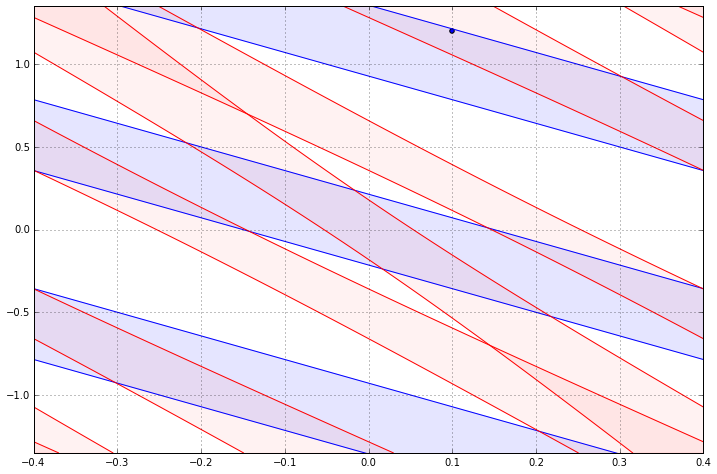

In [24]:
plt.figure(figsize=(12,8))
for n in xrange(-max_bounces_considered, max_bounces_considered +1):
    bottom_boundary = (n*w - 0.5*wg - a)/(0.5*l)
    top_boundary = (n*w + 0.5*wg - a)/(0.5*l)
    plt.plot(a, bottom_boundary, color="blue")
    plt.plot(a, top_boundary, color="blue")
    plt.fill_between(a, bottom_boundary, top_boundary, color="blue", alpha="0.1")

for x_block, y_block in zip(x_blocks, y_blocks):
    block_collision_boundary_left = w - x_block - y_block*tantheta - r_block*np.sqrt(tantheta**2 + 1)
    block_collision_boundary_right = w - x_block - y_block*tantheta + r_block*np.sqrt(tantheta**2 + 1)     
    plt.plot(block_collision_boundary_left, tantheta, color="red")
    plt.plot(block_collision_boundary_right, tantheta, color="red")
    plt.fill_betweenx(tantheta, block_collision_boundary_left, block_collision_boundary_right, color="red", alpha=0.05)

    block_collision_boundary_left = x_block - y_block*tantheta - r_block*np.sqrt(tantheta**2 + 1)
    block_collision_boundary_right = x_block - y_block*tantheta + r_block*np.sqrt(tantheta**2 + 1)     
    plt.plot(block_collision_boundary_left, tantheta, color="red")
    plt.plot(block_collision_boundary_right, tantheta, color="red")
    plt.fill_betweenx(tantheta, block_collision_boundary_left, block_collision_boundary_right, color="red", alpha=0.05)

    block_collision_boundary_left = - w - x_block - y_block*tantheta - r_block*np.sqrt(tantheta**2 + 1)
    block_collision_boundary_right = - w - x_block - y_block*tantheta + r_block*np.sqrt(tantheta**2 + 1)     
    plt.plot(block_collision_boundary_left, tantheta, color="red")
    plt.plot(block_collision_boundary_right, tantheta, color="red")
    plt.fill_betweenx(tantheta, block_collision_boundary_left, block_collision_boundary_right, color="red", alpha=0.05)



plt.scatter([a_shot], [tantheta_shot])
    
plt.ylim([-((max_bounces_considered+0.5)*w + 0.5*wg), ((max_bounces_considered+0.5)*w + 0.5*wg)])    
plt.xlim([-0.5*w, 0.5*w]);
plt.grid(True)

In [25]:
circle = np.linspace(0, 2*np.pi)

[-0.48, 0.48, -0.77, 0.06999999999999999]

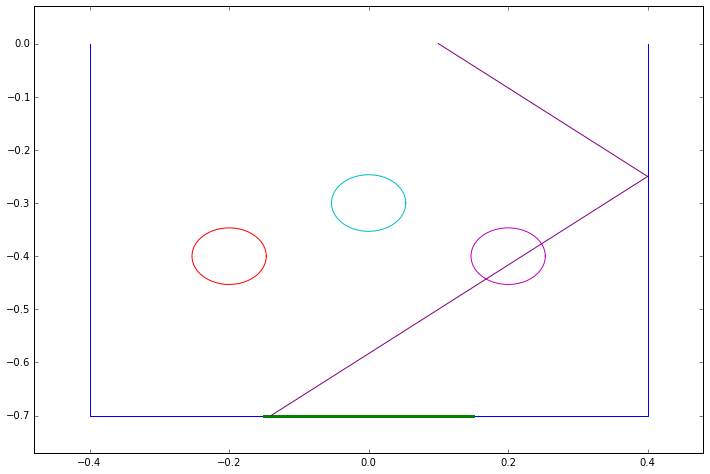

In [26]:
plt.figure(figsize=(12,8))
plt.plot([-0.5*w, -0.5*w, 0.5*w, 0.5*w],
        [0.0, -0.5*l, -0.5*l, 0.0])
plt.plot([-0.5*wg, 0.5*wg], [-0.5*l, -0.5*l], linewidth=3.0)
for x_block, y_block in zip(x_blocks, y_blocks):
    plt.plot(x_block + r_block*np.cos(circle), -y_block + r_block*np.sin(circle))

# plot ball trajectory
if tantheta_shot > (3*w/l - a_shot/(0.5*l)):
    print("Multiple Right Bounces, so no plot")
elif tantheta_shot > (w/l - a_shot/(0.5*l)):
    #right bounce
    sintheta = tantheta_shot / np.sqrt(tantheta_shot**2 + 1)
    costheta = 1.0 / np.sqrt(tantheta_shot**2 + 1)
    before_bounce_path = np.linspace(0, (0.5*w - a_shot)*np.sqrt(1 + 1.0/tantheta_shot**2))
    plt.plot(a_shot + before_bounce_path*sintheta, -before_bounce_path*costheta, color="purple")
    after_bounce_path = np.linspace((0.5*w - a_shot)*np.sqrt(1 + 1.0/tantheta_shot**2),
                                    0.5*l*np.sqrt(1 + tantheta_shot**2))
    plt.plot((w - a_shot) - after_bounce_path*sintheta,
            -after_bounce_path*costheta, color="purple")
    
elif tantheta_shot > -(a_shot + 0.5*w)/(0.5*l):
    # no bounce
    ball_path = np.linspace(0, l/2.0*np.sqrt(1 + tantheta_shot**2))
    plt.plot(a_shot + ball_path * (tantheta_shot/np.sqrt(tantheta_shot**2 + 1)), 
         - ball_path * (1.0/np.sqrt(tantheta_shot**2 + 1)))

elif tantheta_shot > -(a_shot + 1.5*w)/(0.5*l):
    # left bounce
    sintheta = tantheta_shot / np.sqrt(tantheta_shot**2 + 1)
    costheta = 1.0 / np.sqrt(tantheta_shot**2 + 1)
    before_bounce_path = np.linspace(0, (0.5*w + a_shot)*np.sqrt(1 + 1.0/tantheta_shot**2))
    plt.plot(a_shot + before_bounce_path*sintheta, -before_bounce_path*costheta,color="purple")
    after_bounce_path = np.linspace((0.5*w + a_shot)*np.sqrt(1 + 1.0/tantheta_shot**2),
                                    0.5*l*np.sqrt(1 + tantheta_shot**2))
    plt.plot((-w - a_shot) - after_bounce_path*sintheta,
            -after_bounce_path*costheta, color="purple")
    

else:
    print("Multiple Left Bounces, so no plot")


plt.axis([-0.6*w, 0.6*w, -0.55*l, 0.05*l])